In [ ]:
import numpy as np
import pandas as pd
import os
from google.colab import files
uploaded=files.upload()

Saving X_train.csv to X_train.csv


In [ ]:
import io
X_train=pd.read_csv(io.BytesIO(uploaded['X_train.csv']))
X_train.head(3)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267


In [ ]:
uploaded=files.upload()

Saving y_train.csv to y_train.csv


In [ ]:
y_train=pd.read_csv(io.BytesIO(uploaded['y_train.csv']))
y_train.head(3)

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete


In [ ]:
uploaded=files.upload()

Saving X_test.csv to X_test (1).csv


In [ ]:
X_test=pd.read_csv(io.BytesIO(uploaded['X_test.csv']))
X_test.head(3)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,0.91208,-0.38193,-0.050618,0.14028,-0.060205,0.071286,-0.18787,0.29492,2.8027,-9.6816
1,0_1,0,1,0.91220,-0.38165,-0.050573,0.14028,-0.033486,0.060210,-0.18206,0.14944,2.5408,-9.8521
2,0_2,0,2,0.91228,-0.38143,-0.050586,0.14032,-0.029686,0.029476,-0.18441,-0.49741,2.5853,-9.3835


In [ ]:
target = y_train['surface'].value_counts().reset_index().rename(columns = {'index' : 'target'})
target

,target,surface
0,concrete,779
1,soft_pvc,732
2,wood,607
3,tiled,514
4,fine_concrete,363
5,hard_tiles_large_space,308
6,soft_tiles,297
7,carpet,189
8,hard_tiles,21


In [ ]:
print("the dimensions of the training dataset is as follows:{} features and {} samples".format(X_train.shape[1],X_train.shape[0]))

print("the dimensions of the target labels is as follows:{} features and {} samples".format(y_train.shape[1],y_train.shape[0]))

print("The dimensions of the test dataset is as follows:{} features and {} samples".format(X_test.shape[1],X_test.shape[0]))

the dimensions of the training dataset is as follows:13 features and 487680 samples
the dimensions of the target labels is as follows:3 features and 3810 samples
The dimensions of the test dataset is as follows:13 features and 488448 samples


In [ ]:
# checking for missing and duplicated data in the dataset
X_train.isnull().sum()

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64

In [ ]:
y_train.isnull().sum()

series_id    0
group_id     0
surface      0
dtype: int64

In [ ]:
X_test.isnull().sum()

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64

In [ ]:
X_train['is_duplicate'] = X_train.duplicated()
X_train['is_duplicate'].value_counts()

False    487680
Name: is_duplicate, dtype: int64

In [ ]:
X_train = X_train.drop(['is_duplicate'], axis = 1)

In [ ]:
y_train['is_duplicate'] = y_train.duplicated()
y_train['is_duplicate'].value_counts()

False    3810
Name: is_duplicate, dtype: int64

In [ ]:
y_train = y_train.drop(['is_duplicate'], axis = 1)

In [ ]:
X_test['is_duplicate'] = X_test.duplicated()
X_test['is_duplicate'].value_counts()

False    488448
Name: is_duplicate, dtype: int64

In [ ]:
X_test = X_test.drop(['is_duplicate'], axis = 1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0.98, 'Orientation, Angular_velocity and Linear_accelaration Correlation Heatmap for Train dataset')

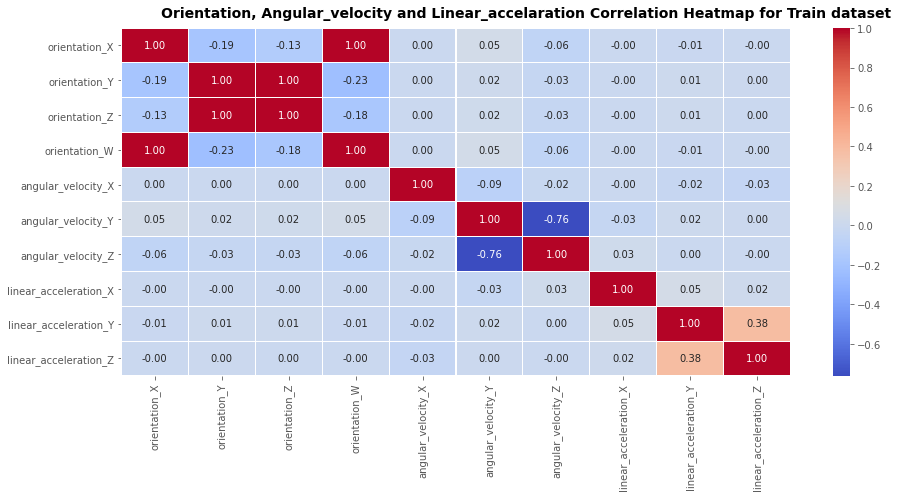

In [ ]:
# now we start plotting the correlation between variables in the training dataset
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py 
from plotly.offline import init_notebook_mode, iplot
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
fig, ax = plt.subplots(1,1, figsize = (15,6))

hm = sns.heatmap(X_train.iloc[:,3:].corr(),
                ax = ax,
                cmap = 'coolwarm',
                annot = True,
                fmt = '.2f',
                linewidths = 0.05)
fig.subplots_adjust(top=0.93)
fig.suptitle('Orientation, Angular_velocity and Linear_accelaration Correlation Heatmap for Train dataset', 
              fontsize=14, 
              fontweight='bold')

Text(0.5, 0.98, 'Orientation, Angular_velocity and Linear_accelaration Correlation Heatmap for Test dataset')

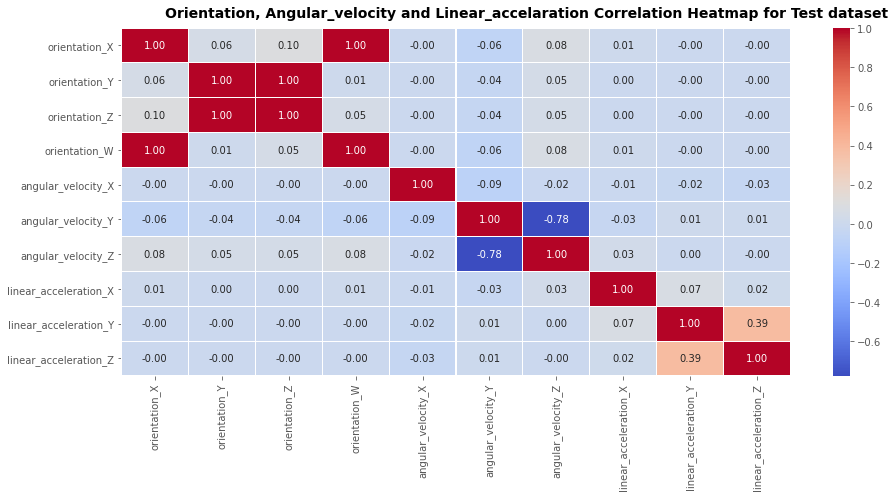

In [ ]:
# now we plot the correlation matrix for the test dataset

fig, ax = plt.subplots(1,1, figsize = (15,6))

hm = sns.heatmap(X_test.iloc[:,3:].corr(),
                ax = ax,
                cmap = 'coolwarm',
                annot = True,
                fmt = '.2f',
                linewidths = 0.05)
fig.subplots_adjust(top=0.93)
fig.suptitle('Orientation, Angular_velocity and Linear_accelaration Correlation Heatmap for Test dataset', 
              fontsize=14, 
              fontweight='bold')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


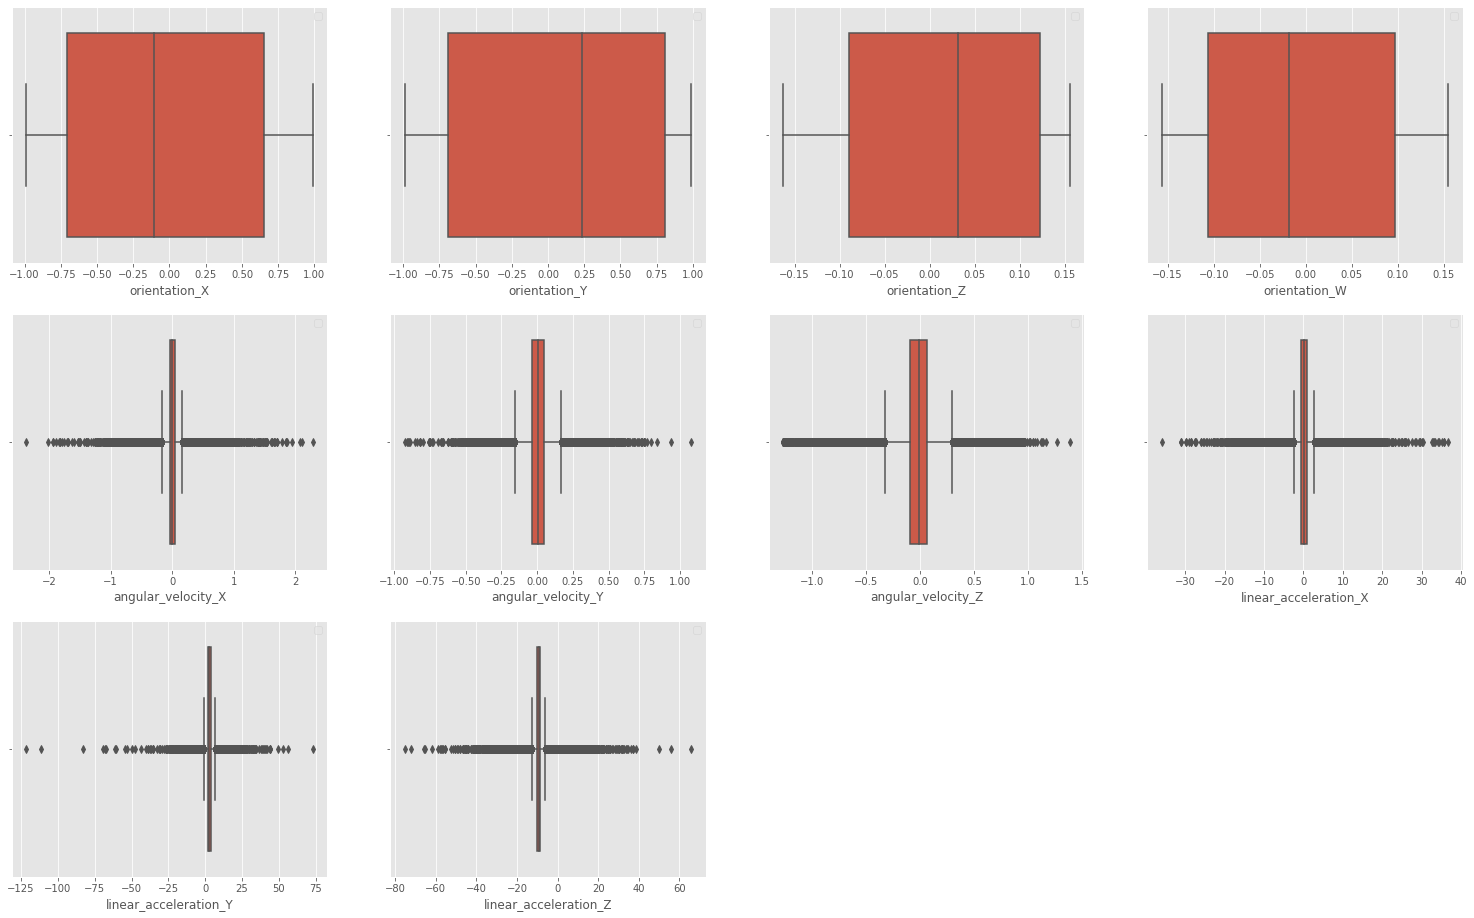

In [ ]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(X_train.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.boxplot(X_train[col])
    #sns.distplot(X_test[col], bins=100, label='test')
    ax.legend()  

In [ ]:
# now that we visually that there exists outliers in the angular veocity and linear acceleration features.
# we now can use statistical method of data skeweness to detect outliers
for col in X_train.columns:
  print(X_train[col].skew())
  X_train[col].describe

2.2335640550466014
0.0
0.0
0.02790573332257871
-0.18099764108496158
-0.17520843451529627
0.03936783705984086
0.052842771570634446
0.11226262946022278
-0.275458306510773
0.11197533667613234
-1.0939047551494838
-0.06535465630487347


In [ ]:
x_trial_train=X_train.copy()

In [ ]:
x_trial_train.head(3)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267


In [ ]:
for col in x_trial_train.columns[7:13]:
  high_1=x_trial_train[col].quantile(0.90)
  low_1=x_trial_train[col].quantile(0.10)
  x_trial_train[col]=np.where(x_trial_train[col] > high_1, x_trial_train[col].quantile(0.5), x_trial_train[col])
  x_trial_train[col]=np.where(x_trial_train[col] < low_1, x_trial_train[col].quantile(0.5), x_trial_train[col])

  

In [ ]:
for col in x_trial_train.columns:
  print(x_trial_train[col].skew())
  x_trial_train[col].describe

2.2335640550466014
0.0
0.0
0.02790573332257871
-0.18099764108496158
-0.17520843451529627
0.03936783705984086
-0.006522355100497096
0.13738480484427862
-0.3612830280724775
0.02392967224557971
0.027320145036635532
0.025247647228714327


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


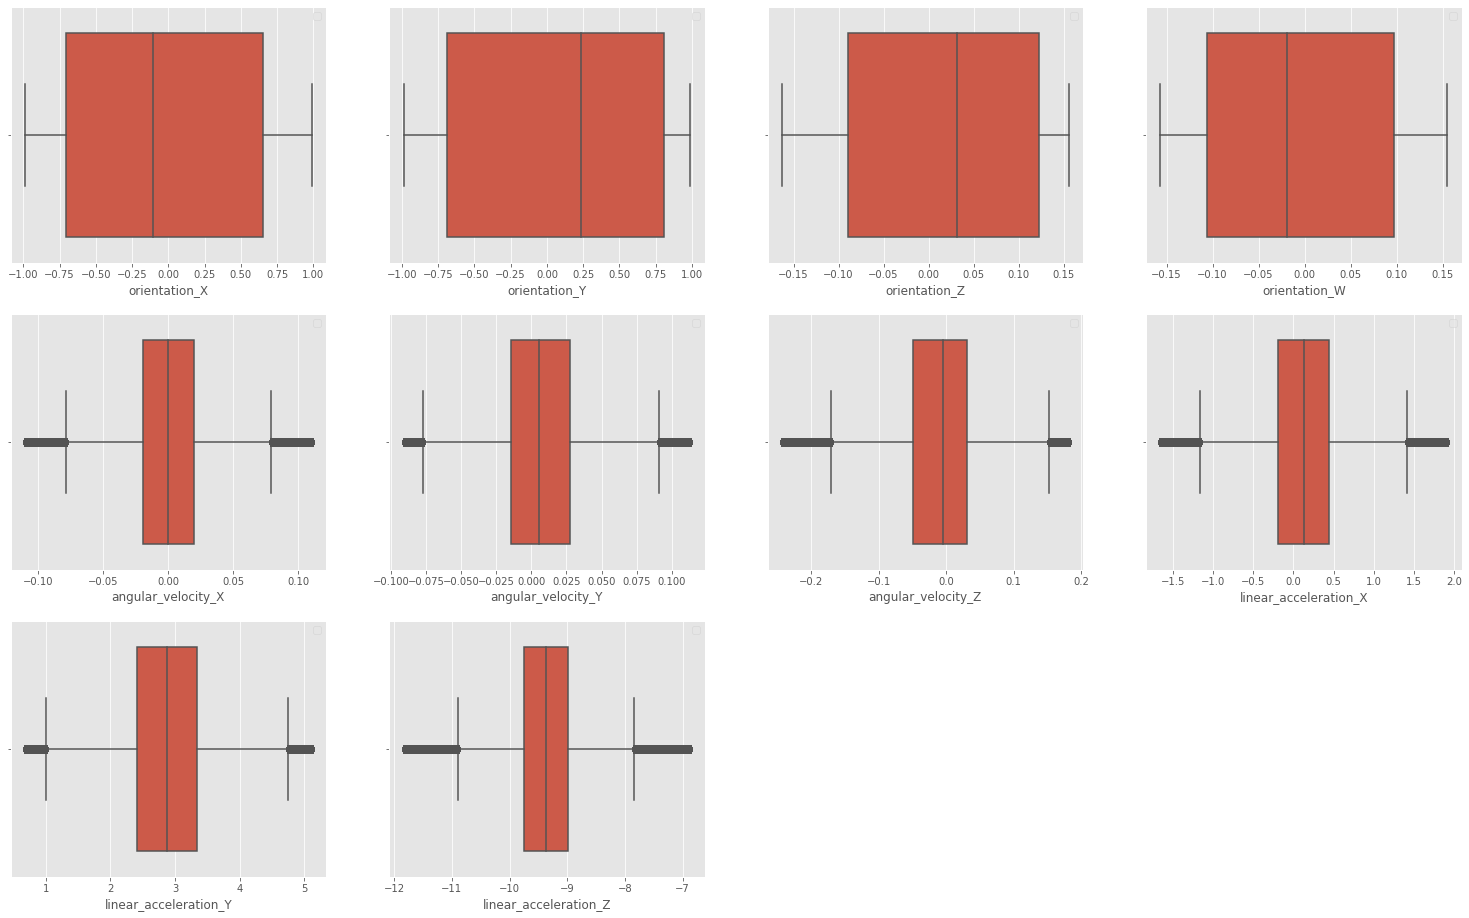

In [ ]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(x_trial_train.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.boxplot(x_trial_train[col])
    ax.legend()  

In [ ]:
x_trial_train_2=X_train.copy()
for col in x_trial_train_2.columns[7:13]:
  high_2=x_trial_train_2[col].quantile(0.95)
  low_2=x_trial_train_2[col].quantile(0.05)
  x_trial_train_2[col]=np.where(x_trial_train_2[col] > high_2, x_trial_train_2[col].quantile(0.5), x_trial_train_2[col])
  x_trial_train_2[col]=np.where(x_trial_train_2[col] < low_2, x_trial_train_2[col].quantile(0.5), x_trial_train_2[col])


In [ ]:
for col in x_trial_train_2.columns:
  print(x_trial_train_2[col].skew())
  x_trial_train_2[col].describe

2.2335640550466014
0.0
0.0
0.02790573332257871
-0.18099764108496158
-0.17520843451529627
0.03936783705984086
0.010405073645117552
0.16685898720775985
-0.5077578745934955
0.011144927093259815
0.03733766630378096
0.013136222960010347


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


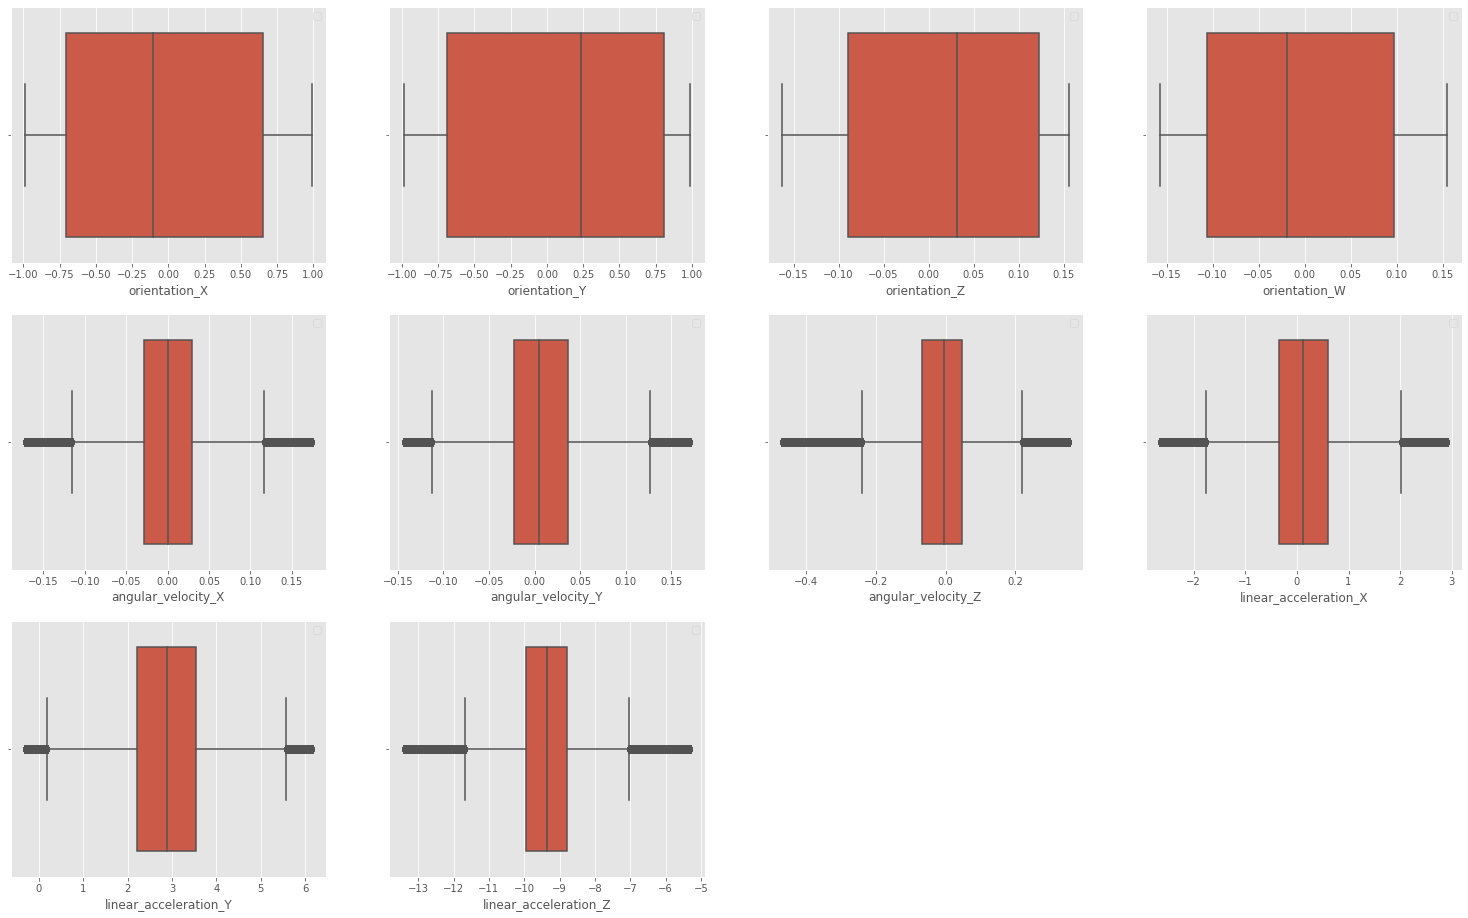

In [ ]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(x_trial_train_2.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.boxplot(x_trial_train_2[col])
    ax.legend() 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


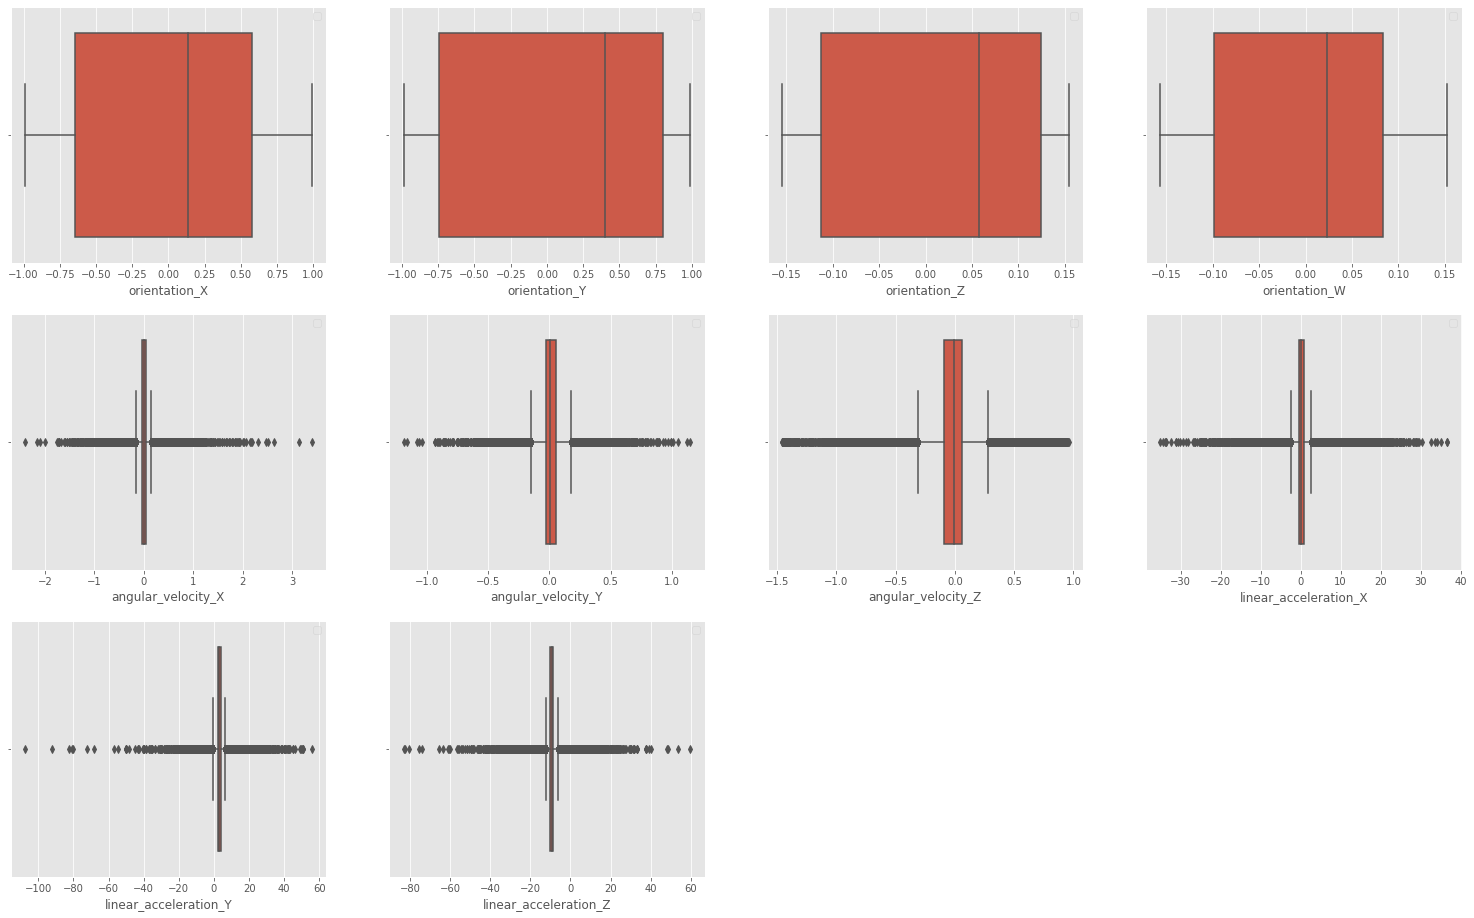

In [ ]:
# now we perform same outlier detection and removal for testing dataset
x_test_trial=X_test.copy()
plt.figure(figsize=(26, 16))
for i, col in enumerate(X_test.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.boxplot(X_test[col])
    ax.legend()  

In [ ]:
for col in x_test_trial.columns[7:13]:
  high_3=x_test_trial[col].quantile(0.95)
  low_3=x_test_trial[col].quantile(0.05)
  x_test_trial[col]=np.where(x_test_trial[col] > high_3, x_test_trial[col].quantile(0.5), x_test_trial[col])
  x_test_trial[col]=np.where(x_test_trial[col] < low_3, x_test_trial[col].quantile(0.5), x_test_trial[col])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


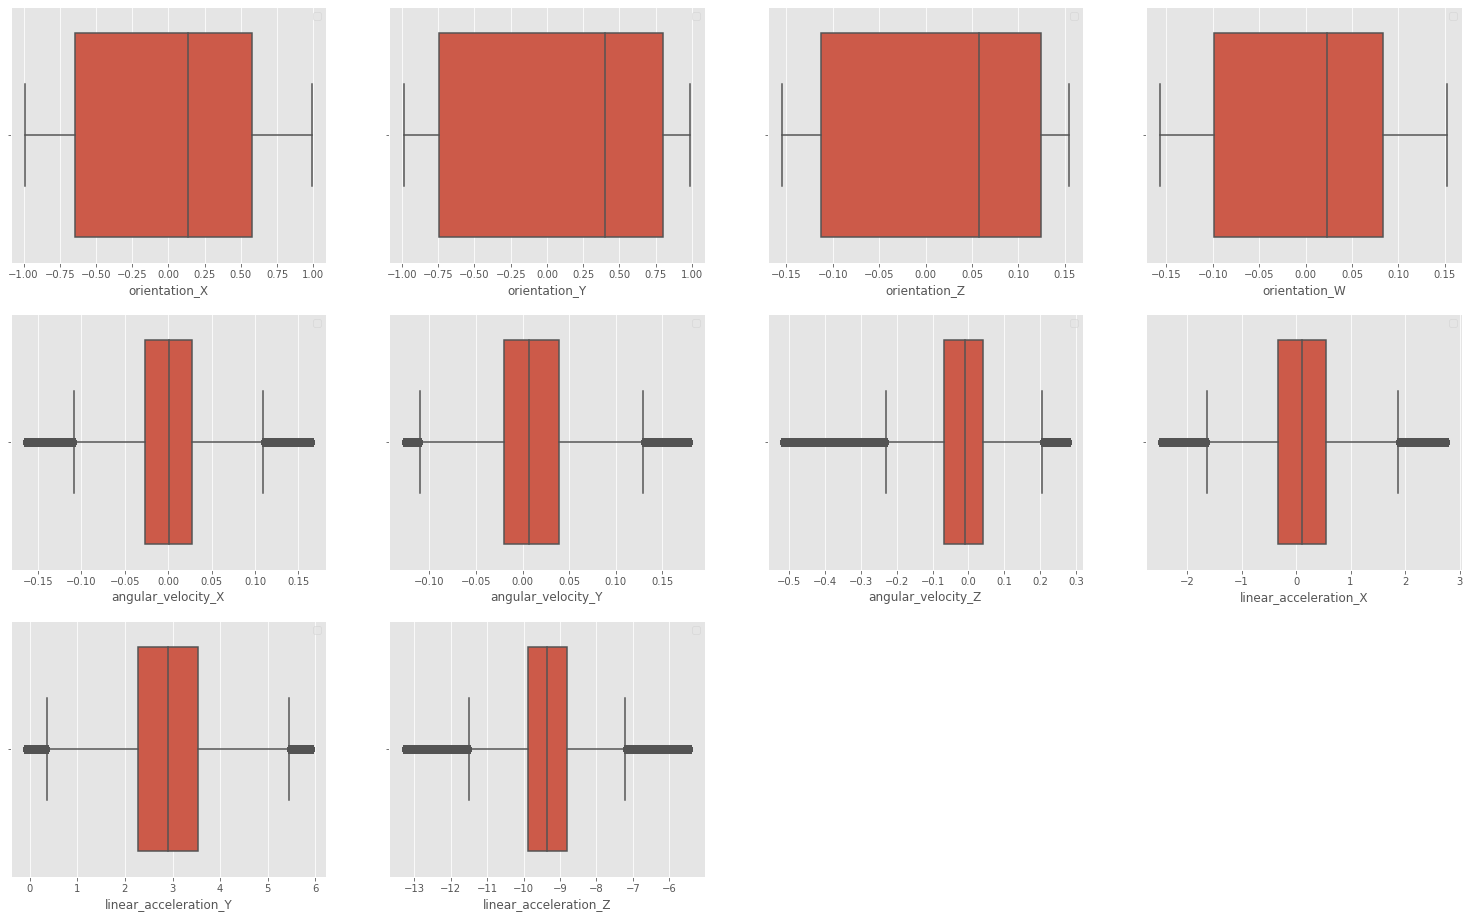

In [ ]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(x_test_trial.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.boxplot(x_test_trial[col])
    ax.legend() 

In [ ]:
# now we start the process of feature engineering
from numpy.fft import *

# train

def filter_signal(signal, threshold=1e3):
  fourier = rfft(signal)
  frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
  fourier[frequencies > threshold] = 0
  return irfft(fourier)

def fast_fourier(noise_1,noise_2):
  for col in noise_1.columns:
    if col[0:3] == 'ang' or col[0:3] == 'lin':
      # Apply filter_signal function to the data in each series
      denoised_data_tr = noise_1.groupby(['series_id'])[col].apply(lambda x: filter_signal(x))
    
  
      # Assign the denoised data back to X_train

      list_denoised_data_tr=[]
      for arr in denoised_data_tr:
        for val in arr:
          list_denoised_data_tr.append(val)

      noise_1[col] = list_denoised_data_tr

  return noise_1, noise_2


def inertia_calculate(data_1, data_2):
  data_1_updated,data_2_updated=fast_fourier(data_1,data_2)
  ixx_train=[]
  ixy_train=[]
  ixz_train=[]
  iyy_train=[]
  iyz_train=[]
  izz_train=[]
  x_tr=data_1_updated['orientation_X'].tolist()
  y_tr=data_1_updated['orientation_Y'].tolist()
  z_tr=data_1_updated['orientation_Z'].tolist()  

  ixx_test=[]
  ixy_test=[]
  ixz_test=[]
  iyy_test=[]
  iyz_test=[]
  izz_test=[]
  x_te=data_2_updated['orientation_X'].tolist()
  y_te=data_2_updated['orientation_Y'].tolist()
  z_te=data_2_updated['orientation_Z'].tolist()  
  
  for element in range(len(x_tr)):
    ixx_train.append(y_tr[element]**2+z_tr[element]**2)
    ixy_train.append(x_tr[element]*y_tr[element])
    ixz_train.append(x_tr[element]*z_tr[element])
    iyz_train.append(y_tr[element]*z_tr[element])
    iyy_train.append(x_tr[element]**2+z_tr[element]**2)
    izz_train.append(x_tr[element]**2+z_tr[element]**2)
  data_1_updated['inertia_x']=ixx_train
  data_1_updated['inertia_xy']=ixy_train
  data_1_updated['inertia_xz']=ixz_train
  data_1_updated['inertia_yz']=iyz_train
  data_1_updated['inertia_y']=iyy_train
  data_1_updated['inertia_z']=izz_train

  for element in range(len(x_te)):
    ixx_test.append(y_te[element]**2+z_te[element]**2)
    ixy_test.append(x_te[element]*y_te[element])
    ixz_test.append(x_te[element]*z_te[element])
    iyz_test.append(y_te[element]*z_te[element])
    iyy_test.append(x_te[element]**2+z_te[element]**2)
    izz_test.append(x_te[element]**2+z_te[element]**2)
  data_2_updated['inertia_x']=ixx_test
  data_2_updated['inertia_xy']=ixy_test
  data_2_updated['inertia_xz']=ixz_test
  data_2_updated['inertia_yz']=iyz_test
  data_2_updated['inertia_y']=iyy_test
  data_2_updated['inertia_z']=izz_test

  return data_1_updated, data_2_updated


def angular_momentum(dataset_1,dataset_2):
  lx_train=[]
  ly_train=[]
  lz_train=[]
  lx_test=[]
  ly_test=[]
  lz_test=[]
  out_1,out_2=inertia_calculate(dataset_1,dataset_2)
  k_tr=out_1['angular_velocity_X'].tolist()
  l_tr=out_1['angular_velocity_Y'].tolist()
  m_tr=out_1['angular_velocity_Z'].tolist()
  h_tr=out_1['inertia_x'].tolist()
  f_tr=out_1['inertia_y'].tolist()
  g_tr=out_1['inertia_z'].tolist()
  q_tr=out_1['inertia_xz'].tolist()
  n_tr=out_1['inertia_yz'].tolist()
  s_tr=out_1['inertia_xy'].tolist()
  k_te=out_2['angular_velocity_X'].tolist()
  l_te=out_2['angular_velocity_Y'].tolist()
  m_te=out_2['angular_velocity_Z'].tolist()
  h_te=out_2['inertia_x'].tolist()
  f_te=out_2['inertia_y'].tolist()
  g_te=out_2['inertia_z'].tolist()
  q_te=out_2['inertia_xz'].tolist()
  n_te=out_2['inertia_yz'].tolist()
  s_te=out_2['inertia_xy'].tolist()
  for element in range(len(k_tr)):
    lx_train.append(h_tr[element]*k_tr[element]-s_tr[element]*l_tr[element]-q_tr[element]*m_tr[element])
    ly_train.append(f_tr[element]*l_tr[element]-s_tr[element]*k_tr[element]-n_tr[element]*m_tr[element])
    lz_train.append(g_tr[element]*m_tr[element]-q_tr[element]*k_tr[element]-n_tr[element]*l_tr[element])
  out_1['angular_momentum_x']=lx_train
  out_1['angular_momentum_y']=ly_train
  out_1['angular_momentum_z']=lz_train
  for element in range(len(k_te)):
    lx_test.append(h_te[element]*k_te[element]-s_te[element]*l_te[element]-q_te[element]*m_te[element])
    ly_test.append(f_te[element]*l_te[element]-s_te[element]*k_te[element]-n_te[element]*m_te[element])
    lz_test.append(g_te[element]*m_te[element]-q_te[element]*k_te[element]-n_te[element]*l_te[element])
  out_2['angular_momentum_x']=lx_test
  out_2['angular_momentum_y']=ly_test
  out_2['angular_momentum_z']=lz_test

  return out_1,out_2

#data_update=angular_momentum(df)
#data_update.head(5)
  
def kinetic_energy(dataset_3,dataset_4):
  data_update_3, data_update_4=angular_momentum(dataset_3,dataset_4)
  trans_kin_energy_train=[]
  trans_kin_energy_test=[]
  lin_acc_x_tr=data_update_3['linear_acceleration_X'].tolist()
  lin_acc_y_tr=data_update_3['linear_acceleration_Y'].tolist()
  lin_acc_z_tr=data_update_3['linear_acceleration_Z'].tolist()
  lin_acc_x_te=data_update_4['linear_acceleration_X'].tolist()
  lin_acc_y_te=data_update_4['linear_acceleration_Y'].tolist()
  lin_acc_z_te=data_update_4['linear_acceleration_Z'].tolist()
  for element in range(len(lin_acc_x_tr)):
    trans_kin_energy_train.append(0.5*(lin_acc_x_tr[element]**2+lin_acc_y_tr[element]**2+lin_acc_z_tr[element]**2))
  data_update_3['translational Kinetic Energy']=trans_kin_energy_train
  for element in range(len(lin_acc_x_te)):
    trans_kin_energy_test.append(0.5*(lin_acc_x_te[element]**2+lin_acc_y_te[element]**2+lin_acc_z_te[element]**2))
  data_update_4['translational Kinetic Energy']=trans_kin_energy_test


  return data_update_3,data_update_4

def rotational_kinetic(data_update_5,data_update_6):
  update_5_train, update_6_test =kinetic_energy(data_update_5,data_update_6)
  rot_kin_energy_train=[]
  rot_kin_energy_test=[]
  in_tr=update_5_train['inertia_x'].tolist()
  in_te=update_6_test['inertia_x'].tolist()
  for element in range(len(in_tr)):
    rot_kin_energy_train.append(0.5*in_tr[element]**2+0.5*in_tr[element]**2+0.5*in_tr[element]**2)
  update_5_train['rot_kin_energy']=rot_kin_energy_train
  for element in range(len(in_te)):
    rot_kin_energy_test.append(0.5*in_te[element]**2+0.5*in_te[element]**2+0.5*in_te[element]**2)
  update_6_test['rot_kin_energy']=rot_kin_energy_test

  return update_5_train, update_6_test

#final_1=rotational_kinetic()
#final_1.head(5)

def quaternion_to_euler(qx,qy,qz,qw):
    import math
    # roll (x-axis rotation)
    sinr_cosp = +2.0 * (qw * qx + qy + qz)
    cosr_cosp = +1.0 - 2.0 * (qx * qx + qy * qy)
    roll = math.atan2(sinr_cosp, cosr_cosp)
    
    # pitch (y-axis rotation)
    sinp = +2.0 * (qw * qy - qz * qx)
    if(math.fabs(sinp) >= 1):
        pitch = copysign(M_PI/2, sinp)
    else:
        pitch = math.asin(sinp)
        # yaw (z-axis rotation)
    siny_cosp = +2.0 * (qw * qz + qx * qy)
    cosy_cosp = +1.0 - 2.0 * (qy * qy + qz * qz)
    yaw = math.atan2(siny_cosp, cosy_cosp)
    
    return roll, pitch, yaw

def eular_angle(data_7,data_8):
  final_tr, final_te=rotational_kinetic(data_7,data_8)
  a_tr=final_tr['orientation_X'].tolist()
  b_tr=final_tr['orientation_Y'].tolist()
  c_tr=final_tr['orientation_Z'].tolist()
  d_tr=final_tr['orientation_W'].tolist()
  a_te=final_te['orientation_X'].tolist()
  b_te=final_te['orientation_Y'].tolist()
  c_te=final_te['orientation_Z'].tolist()
  d_te=final_te['orientation_W'].tolist()
  nx_tr=[]
  ny_tr=[] 
  nz_tr=[]
  nx_te=[]
  ny_te=[] 
  nz_te=[]
  for i in range(len(a_tr)):
    xx_tr, yy_tr, zz_tr = quaternion_to_euler(a_tr[i], b_tr[i], c_tr[i], d_tr[i])
    nx_tr.append(xx_tr)
    ny_tr.append(yy_tr)
    nz_tr.append(zz_tr)
  final_tr['euler_x']=nx_tr
  final_tr['euler_y']=ny_tr
  final_tr['euler_z']=nz_tr
  for i in range(len(a_te)):
    xx_te, yy_te, zz_te = quaternion_to_euler(a_te[i], b_te[i], c_te[i], d_te[i])
    nx_te.append(xx_te)
    ny_te.append(yy_te)
    nz_te.append(zz_te)
  final_te['euler_x']=nx_te
  final_te['euler_y']=ny_te
  final_te['euler_z']=nz_te

  return final_tr,final_te
    

#xtrain_update,xtest_update=eular_angle(X_train,X_test)
#xtrain_update.head(5)
#xtest_update.head(5)
#xtest_update.shape
def fe_eng_tr(last_train, last_test):
    df_new_train = pd.DataFrame()
    model_train=eular_angle(last_train,last_test)[0]
    for col in model_train.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        df_new_train[col + '_mean'] = model_train.groupby(['series_id'])[col].mean()
        df_new_train[col + '_median'] = model_train.groupby(['series_id'])[col].median()
        df_new_train[col + '_max'] = model_train.groupby(['series_id'])[col].max()
        df_new_train[col + '_min'] = model_train.groupby(['series_id'])[col].min()
        df_new_train[col + '_std'] = model_train.groupby(['series_id'])[col].std()
        df_new_train[col + '_range'] = df_new_train[col + '_max'] - df_new_train[col + '_min']
        df_new_train[col + '_maxtoMin'] = df_new_train[col + '_max'] / df_new_train[col + '_min']
        #in statistics, the median absolute deviation (MAD) is a robust measure of the variablility of a univariate sample of quantitative data.
        df_new_train[col + '_mad'] = model_train.groupby(['series_id'])[col].apply(lambda x: np.median(np.abs(np.diff(x))))
        df_new_train[col + '_abs_max'] = model_train.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        df_new_train[col + '_abs_min'] = model_train.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        df_new_train[col + '_abs_avg'] = (df_new_train[col + '_abs_min'] + df_new_train[col + '_abs_max'])/2
    return df_new_train


def fe_eng_te(last_train, last_test):
    df_new_test = pd.DataFrame()
    model_test=eular_angle(last_train,last_test)[1]
    for col in model_test.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        df_new_test[col + '_mean'] = model_test.groupby(['series_id'])[col].mean()
        df_new_test[col + '_median'] = model_test.groupby(['series_id'])[col].median()
        df_new_test[col + '_max'] = model_test.groupby(['series_id'])[col].max()
        df_new_test[col + '_min'] = model_test.groupby(['series_id'])[col].min()
        df_new_test[col + '_std'] = model_test.groupby(['series_id'])[col].std()
        df_new_test[col + '_range'] = df_new_test[col + '_max'] - df_new_test[col + '_min']
        df_new_test[col + '_maxtoMin'] = df_new_test[col + '_max'] / df_new_test[col + '_min']
        #in statistics, the median absolute deviation (MAD) is a robust measure of the variablility of a univariate sample of quantitative data.
        df_new_test[col + '_mad'] = model_test.groupby(['series_id'])[col].apply(lambda x: np.median(np.abs(np.diff(x))))
        df_new_test[col + '_abs_max'] = model_test.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        df_new_test[col + '_abs_min'] = model_test.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        df_new_test[col + '_abs_avg'] = (df_new_test[col + '_abs_min'] + df_new_test[col + '_abs_max'])/2
    return df_new_test

final_train_sample=fe_eng_tr(x_trial_train_2, x_test_trial)
#final_train_sample.shape
final_test_sample=fe_eng_te(x_trial_train_2, x_test_trial)
#final_test_sample.shape
from sklearn.preprocessing import StandardScaler
final_train_sample_stand=final_train_sample.copy()
final_test_sample_stand=final_test_sample.copy()
for i in final_train_sample_stand.columns:
  scale_1 = StandardScaler().fit(final_train_sample_stand[[i]])

  final_train_sample_stand[i] = scale_1.transform(final_train_sample_stand[[i]])

for i in final_test_sample_stand.columns:
  scale_2 = StandardScaler().fit(final_test_sample_stand[[i]])

  final_test_sample_stand[i] = scale_2.transform(final_test_sample_stand[[i]])
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y_train['surface'] = le.fit_transform(y_train['surface'])

#y_train.head()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train['surface'] = le.fit_transform(y_train['surface'])



In [ ]:
# Now we can implement autoencoder neural networks
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(170, input_dim=264, activation='relu'))
	model.add(Dense(9, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=2000, batch_size=50, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, final_train_sample_stand.values, y_train['surface'].values, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 87.61% (2.60%)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model_1 = Sequential()
model_1.add(Dense(265, activation='relu', input_shape=(264,)))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(70, activation='relu'))
model_1.add(Dense(9, activation='softmax'))
model_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model_1.fit(final_train_sample_stand, y_train['surface'],epochs=100, batch_size=50, verbose=1)
score = model_1.evaluate(final_train_sample_stand, y_train['surface'],verbose=1)

print(score)

Epoch 1/100
77/77 [==============================] - 0s 3ms/step - loss: 9.2650 - accuracy: 0.0997
Epoch 2/100
77/77 [==============================] - 0s 3ms/step - loss: 9.2333 - accuracy: 0.0953
Epoch 3/100
77/77 [==============================] - 0s 3ms/step - loss: 9.2313 - accuracy: 0.0934
Epoch 4/100
77/77 [==============================] - 0s 3ms/step - loss: 9.2309 - accuracy: 0.1312
Epoch 5/100
77/77 [==============================] - 0s 3ms/step - loss: 9.2305 - accuracy: 0.1325
Epoch 6/100
77/77 [==============================] - 0s 3ms/step - loss: 9.2304 - accuracy: 0.1255
Epoch 7/100
77/77 [==============================] - 0s 3ms/step - loss: 9.2304 - accuracy: 0.1396
Epoch 8/100
77/77 [==============================] - 0s 3ms/step - loss: 9.2303 - accuracy: 0.1236
Epoch 9/100
77/77 [==============================] - 0s 3ms/step - loss: 9.2302 - accuracy: 0.0840
Epoch 10/100
77/77 [==============================] - 0s 3ms/step - loss: 9.2302 - accuracy: 0.0782
Epoch 11/